# INTRO TO DEEP LEARNING USING TENSORFLOW
##### A simple image classifier using Convolutional Neural Network with MNIST Dataset 

### Import all the necessary packages

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

2023-08-25 20:29:13.651699: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 20:29:13.679827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 20:29:13.680345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 20:29:14.292688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load the dataset
- This function will download the dataset from the tensorflow.keras dataset library
- The loaded images should be resized to the same size
- Labels of the images will just state the number, the label data has to be modified to one hot encoded labels to train the model using any data
- Finally, it returns the train and test features and labels 

In [2]:
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    print(trainY)
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    print(trainY)
    
    return trainX, trainY, testX, testY

# Defining the Model
- There are two types of models in Deep Learning in general: Sequential and Functional. Sequential is the basic type and it sufficient enough for some datasets

- Here the model type is intialized as a Sequential Model
- New Layers can be added using model.add() function
- Conv2D Stands for 2-Dimensional Convolutional Neural Network Layer where the number of filters, kernel size and the activation function is defined
- MaxPooling2D Stands for 2-Dimensional Max Pooling Layer and the size of the pooling layer size is defined here
- Flatten Layer converts any dimensional input into one dimensional output
- Dense Layer is the normal feed forward neural network layer and it takes the number of neurons, activation layer as parameters
- The model is compiled using by defining the optimizer, loss function and valuing the training accuracy of the model

In [3]:
def define_model():
    model = Sequential()
    model.add(Conv2D(16,(2,2), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(32,(2,2),activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Train: X=(60000, 28, 28, 1), y=(60000, 10)
Test: X=(10000, 28, 28, 1), y=(10000, 10)


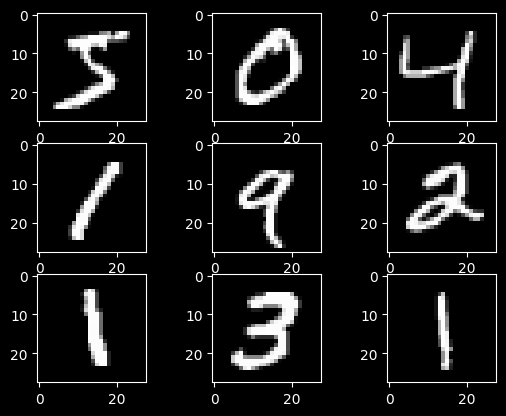

Epoch 1/10


2023-08-25 20:29:39.004490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2674 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0434 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0392 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 10/10
313/313 [==============================] - 0s 857us/step - loss: 0.0659 - accurac

[0.06589798629283905, 0.9825000166893005]

In [4]:
train_X, train_y, test_x, test_y = load_dataset()
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_x.shape, test_y.shape))

# plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()

model = define_model()
model.fit(train_X, train_y, epochs=10, batch_size=32)

# Evaluate the model using testing dataset
model.evaluate(test_x, test_y)